<a href="https://colab.research.google.com/github/jose01ve/Diplomadove_01/blob/main/Copia_final_trabajo_profe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, header=None, names=columns)



In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Figure size 1200x800 with 0 Axes>

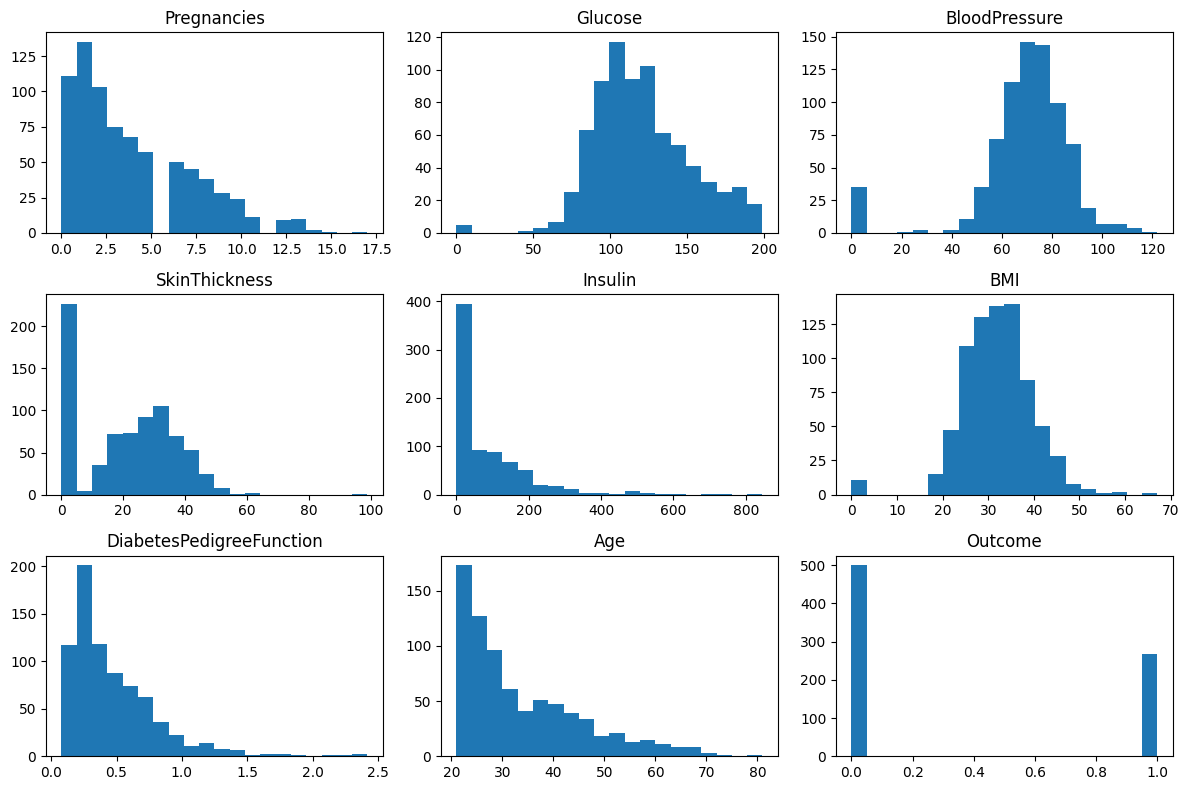

In [ ]:
plt.figure(figsize=(12, 8))
data.hist(bins=20, figsize=(12, 8), grid=False)
plt.tight_layout()
plt.show()



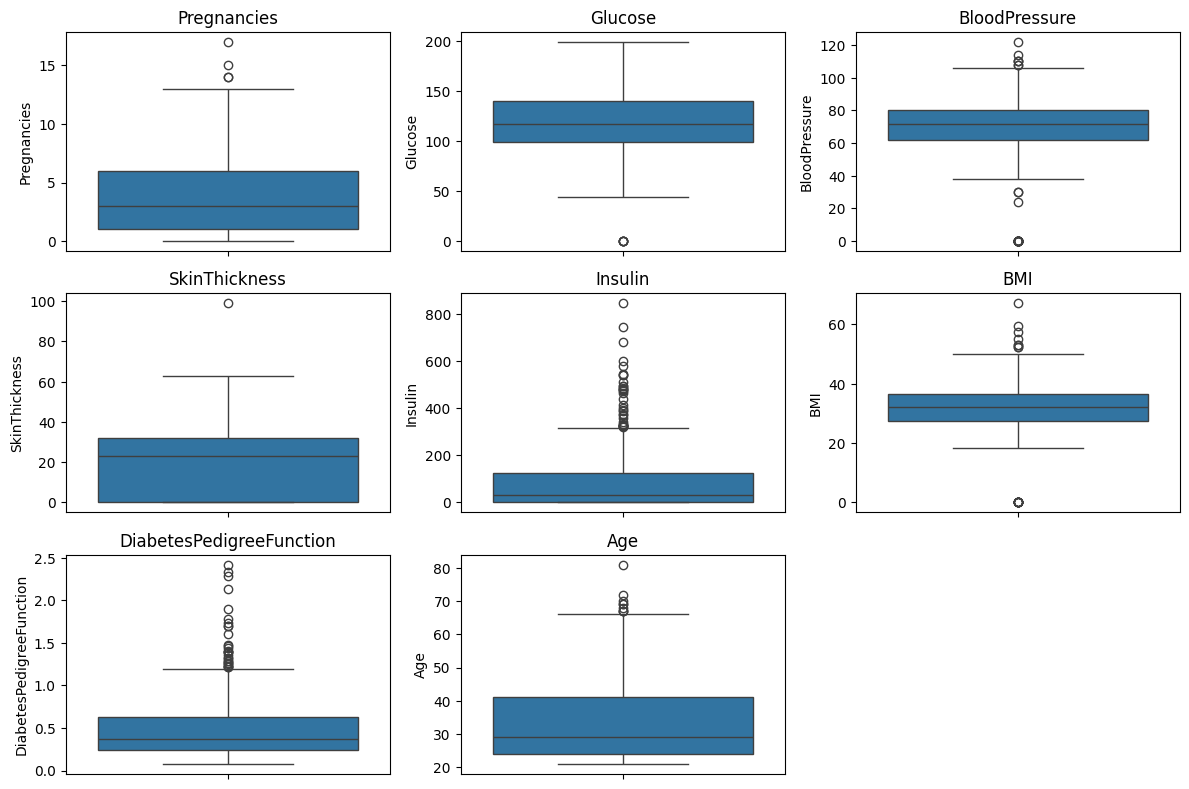

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

q_low = 0.01
q_high = 0.99
for col in columns[:-1]:
    low = data[col].quantile(q_low)
    high = data[col].quantile(q_high)
    data = data[(data[col] >= low) & (data[col] <= high)]


In [ ]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
y.head()

,Outcome
0,1
1,0
2,1
3,0
5,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)


Matriz de confusión:
 [[81 12]
 [27 20]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.75      0.87      0.81        93
           1       0.62      0.43      0.51        47

    accuracy                           0.72       140
   macro avg       0.69      0.65      0.66       140
weighted avg       0.71      0.72      0.71       140


Precisión del modelo: 0.7214285714285714


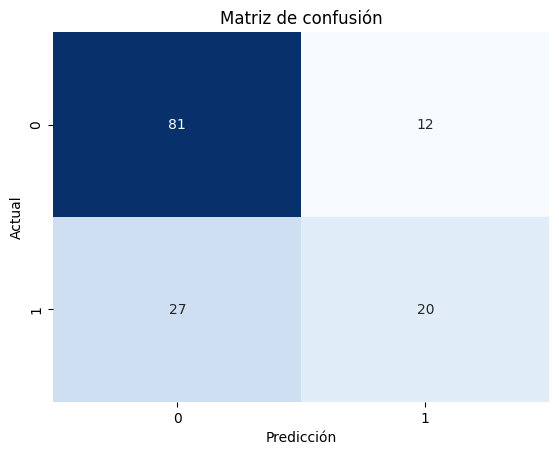

In [ ]:
y_pred = model.predict(X_test)
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de confusión")
plt.ylabel("Actual")
plt.xlabel("Predicción")
plt.show()


In [ ]:
# Crear un nuevo ejemplo para probar
# Cambia los valores según las características del modelo
nuevo_dato = pd.DataFrame({
    "Pregnancies": [2],
    "Glucose": [200],
    "BloodPressure": [70],
    "SkinThickness": [25],
    "Insulin": [100],
    "BMI": [28.5],
    "DiabetesPedigreeFunction": [0.7],
    "Age": [32]
})

# Verificar el formato del nuevo dato
print("Nuevo dato para prueba:\n", nuevo_dato)

# Realizar predicción
prediccion = model.predict(nuevo_dato)

# Mostrar resultado
if prediccion[0] == 1:
    print("Predicción: Positivo (Es probable que tenga diabetes).")
else:
    print("Predicción: Negativo (Es poco probable que tenga diabetes).")


Nuevo dato para prueba:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      200             70             25      100  28.5   

   DiabetesPedigreeFunction  Age  
0                       0.7   32  
Predicción: Positivo (Es probable que tenga diabetes).
